<a href="https://colab.research.google.com/github/Amityadav9/TweetSA/blob/main/TweetSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns # interactive visualization library built on top on matplotlib

In [ ]:
import nltk
nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import tensorflow as tf


In [ ]:
from google.colab import files
df = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train_dataset = df['tweet']
train_dataset.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [ ]:
labels_dataset = df['label']

In [ ]:
print("Hatred labeled: {}\nNon-hatred labeled: {}".format(
    (labels_dataset == 1).sum(),
    (labels_dataset == 0).sum()
))

Hatred labeled: 2242
Non-hatred labeled: 29720


In [ ]:
import nltk
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score #

In [ ]:
#Preprocessing the tweet column

def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [ ]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['normalized_text'] = df.tweet.apply(normalizer)

In [ ]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [ ]:
df['hashtag'] = df.tweet.apply(extract_hashtag)

In [ ]:
df.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [ ]:
print(len(df['normalized_text']))

31962


In [ ]:
all_words = " ".join(df.normalized_text)
print(len(all_words))

1700028


In [ ]:
hatred_words = " ".join(df[df['label']==1].normalized_text)
print(len(hatred_words))

129320


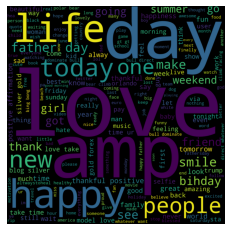

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

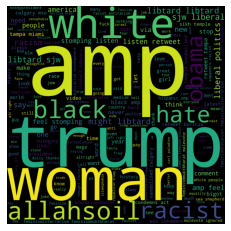

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='black')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

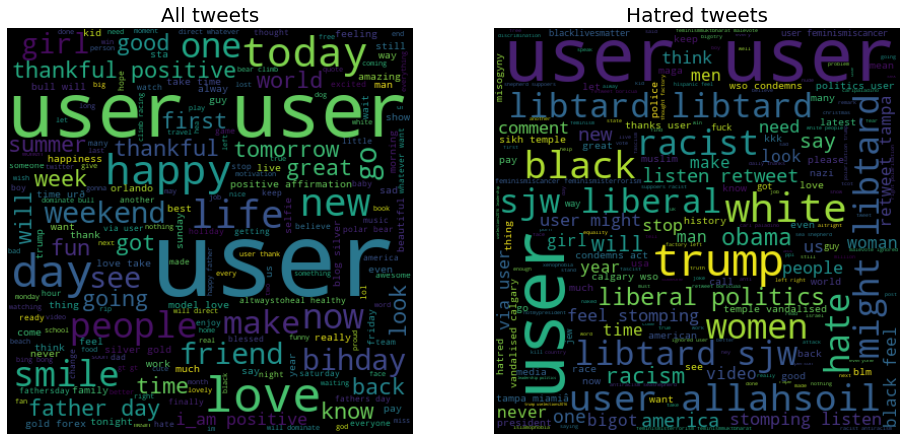

In [ ]:
stopwords = STOPWORDS.add('amp')
all_words = ' '.join(df.tweet.values)
hatred_words = ' '.join(df[df.label == 1].tweet.values)

plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=400, background_color='black', stopwords=stopwords).generate(all_words)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('All tweets', size=20)

cloud2 = WordCloud(width=400, height=400, background_color='black', stopwords=stopwords).generate(hatred_words)
plt.subplot(122)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Hatred tweets', size=20)
plt.show()

In [ ]:
freq_all_hashtag = FreqDist(list((" ".join(df.hashtag)).split())).most_common(15)
freq_all_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364),
 ('affirmation', 363),
 ('blog', 353),
 ('fathersday', 341),
 ('i', 339),
 ('me', 339)]

In [ ]:
freq_hatred_hashtag = FreqDist(list((" ".join(df[df['label']==1]['hashtag'])).split())).most_common(13)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32),
 ('tampa', 32),
 ('s', 28),
 ('bigot', 28)]

In [ ]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head(10))
print(df_hatredhashtag.head(10))

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
5       fun        463
6      life        438
7    summer        392
8     model        366
9      cute        364
       words  frequency
0      trump        134
1   politics         95
2  allahsoil         92
3    libtard         76
4    liberal         75
5        sjw         74
6    retweet         63
7      miami         46
8      black         44
9       hate         32


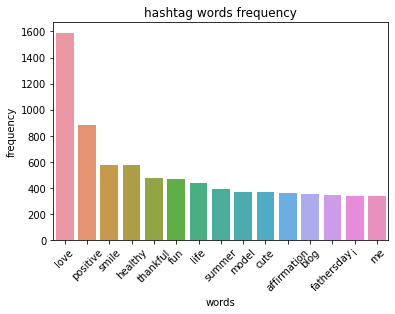

In [ ]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

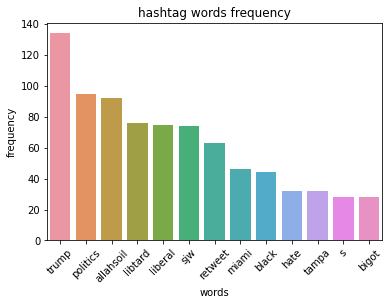

In [ ]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

In [ ]:
# to create sparse matrix corpus is created to pass to vectorizer
len(df)
corpus = []
for i in range(0,31962):
    corpus.append(df['normalized_text'][i])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
token = Tokenizer()
token.fit_on_texts(corpus)
token

In [ ]:
vocab = len(token.index_word)+1
vocab

35129

In [ ]:
encoded_text =token.texts_to_sequences(corpus)

In [ ]:
encoded_text

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = df['normalized_text'].tolist()
labels = df['label'].tolist()

In [ ]:
print (sentences[5:10])
print(labels[5:10])

['huge fan fare big talking leave chaos pay dispute get allshowandnogo', 'camping tomorrow danny', 'next school year year exam think school exam hate imagine actorslife revolutionschool girl', 'love land allin cavs champion cleveland clevelandcavaliers', 'welcome gr']
[0, 0, 0, 0, 0]


In [ ]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0: training_size]
testing_senteces = sentences[: training_size]
training_labels = labels[0: training_size]
testing_labels = labels[: training_size]

# Put labels into list to use later:

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:

vocab_size = 1000
embedding_dim = 16
max_length = 280
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(embedding_dim,
                         return_sequences=True)
))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])


In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
num_epochs=10
modelo = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),
          callbacks=[callbacks])

Epoch 1/10
800/800 [==============================] - 27s 34ms/step - loss: 0.2228 - accuracy: 0.9290 - val_loss: 0.1874 - val_accuracy: 0.9466
Epoch 2/10
800/800 [==============================] - 26s 33ms/step - loss: 0.1856 - accuracy: 0.9397 - val_loss: 0.1539 - val_accuracy: 0.9431
Epoch 3/10
800/800 [==============================] - 26s 33ms/step - loss: 0.1527 - accuracy: 0.9464 - val_loss: 0.1358 - val_accuracy: 0.9508
Epoch 4/10
800/800 [==============================] - 26s 33ms/step - loss: 0.1336 - accuracy: 0.9525 - val_loss: 0.1248 - val_accuracy: 0.9535
Epoch 5/10
800/800 [==============================] - 26s 33ms/step - loss: 0.1241 - accuracy: 0.9556 - val_loss: 0.1121 - val_accuracy: 0.9591
Epoch 6/10
800/800 [==============================] - 27s 33ms/step - loss: 0.1174 - accuracy: 0.9589 - val_loss: 0.1050 - val_accuracy: 0.9634
Epoch 7/10
800/800 [==============================] - 27s 34ms/step - loss: 0.1124 - accuracy: 0.9604 - val_loss: 0.1002 - val_accuracy:

In [ ]:
model.save('/tmp/final_Tweet_sentiment_analysis.hdf5')

Text(0, 0.5, 'Accuracy')

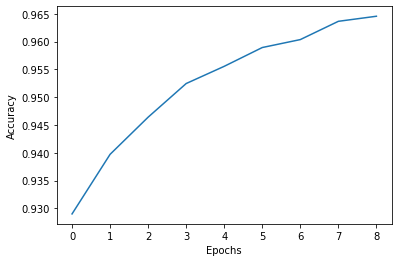

In [ ]:
 #Decrease because the early stopping

plt.plot(modelo.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

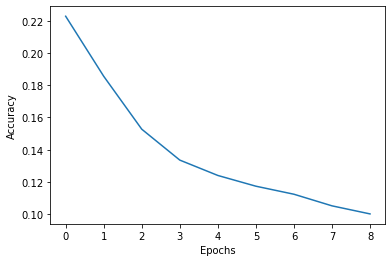

In [ ]:

# Increase because the early stopping

plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']


NameError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(testing_labels)
print('Test Loss: {}'.format(test_loss))
print('Test Acc: {}'.format(test_acc))

NameError: ignored

In [ ]:
def pad_to_size(vec, size):
  zeros = [0]* (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
   plt.plot(history.history[metric]) 
   plt.plot(history.history['val_'+metric],'')
   plt.xlabel("Epochs")
   plt.ylabel(metric)
   plt.legend([metric,'val_'+metric])
   plt.show() 

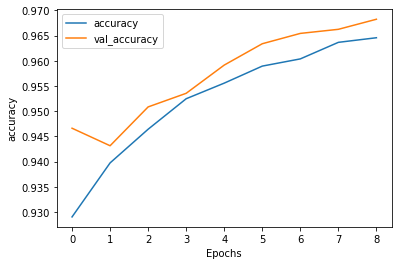

In [ ]:
plot_graphs(modelo,'accuracy')


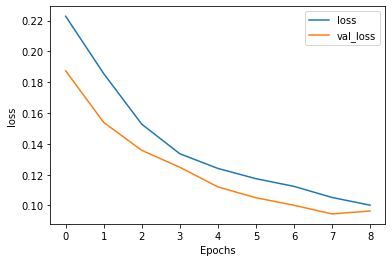

In [ ]:
plot_graphs(modelo,'loss')

In [ ]:
y1_pred = model.predict(testing_labels)
#y1_prob = modelo.predict_proba(testing_labels_final)
y1_pred

array([[[0.24429439]],

       [[0.24429439]],

       [[0.24429439]],

       ...,

       [[0.24429439]],

       [[0.24429439]],

       [[0.24429445]]], dtype=float32)